In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine

In [23]:
query_vc = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%cook%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
  	 OR long_desc LIKE "%frozen%"
 	 OR long_desc LIKE "%with salt%");
"""


query_vr = """ 
SELECT * FROM vegetables
WHERE food_group_id = 1100
AND long_desc LIKE '%raw%'
AND NOT(long_desc LIKE "%beans%"
     OR long_desc LIKE "%peas%"
     OR long_desc LIKE "%lentils%"
     OR long_desc LIKE "%leaves%"
	 OR long_desc LIKE "%greens%"
	 OR long_desc LIKE "%mushroom%"
      );
"""

query_fd = """ 
SELECT * FROM fruits_dried
WHERE food_group_id = 900
AND (long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%")
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""

query_fr = """ 
SELECT * FROM fruits_raw
WHERE food_group_id = 900
AND NOT (long_desc LIKE "%juice%"
OR long_desc LIKE "%sauce%"
OR long_desc LIKE "%canned%"
OR long_desc LIKE "%frozen%"
OR long_desc LIKE "%dried%"
OR long_desc LIKE "%dehydrated%"
OR long_desc LIKE "%peel%"
OR long_desc LIKE "%cooked%"
OR long_desc LIKE "%California%"
OR long_desc LIKE "%Florida%"
OR long_desc LIKE "%navels%"
OR id LIKE "9111"
);
"""


database_url = 'sqlite:///C:/Users/Vartotojas/Desktop/programavimas/baigiamasis_darbas/db/db.sqlite3'

engine = create_engine(database_url)

with engine.connect() as conn:
     df_v_fr = pd.read_sql_query(query_fr, engine)
     df_v_vc = pd.read_sql_query(query_vc, engine)
     df_v_fd = pd.read_sql_query(query_fd, engine)
     df_v_vr = pd.read_sql_query(query_vr, engine)

In [44]:
union_dfs = pd.concat([df_v_fr, df_v_vc, df_v_fd, df_v_vr])
union_dfs.head()


# fiber_g_df = df[['long_desc', 'fiber_in_g']].sort_values(by="fiber_in_g",ascending=False)
# top_20_values = fiber_g_df.head(30)
# print(top_20_values)


,food_group_id,name,id,long_desc,kcal_in_100g,mg_in_mg,zn_in_mg,fa_in_mcg,p_in_mg,vitamin_a_in_mcg,...,fiber_in_g,fiber_in_100kcal,mg_mg_in_100kcal,zn_mg_in_100kcal,fa_mgc_in_100kcal,vitamin_a_in_mcg_100kcal,vitamin_c_in_mcg_100kcal,vitamin_c_in_mg_100kcal,vitamin_e_in_mg_100kcal,p_mg_in_100kcal
0,900,Fruits and Fruit Juices,9003,"Apples, raw, with skin",52.0,5.0,0.04,0.0,11.0,3.0,...,2.4,4.615385,9.615385,0.076923,0,5.769231,8.846154,8.846154,0.346154,21.153846
1,900,Fruits and Fruit Juices,9004,"Apples, raw, without skin",48.0,4.0,0.05,0.0,11.0,2.0,...,1.3,2.708333,8.333333,0.104167,0,4.166667,8.333333,8.333333,0.104167,22.916667
2,900,Fruits and Fruit Juices,9021,"Apricots, raw",48.0,10.0,0.20,0.0,23.0,96.0,...,2.0,4.166667,20.833333,0.416667,0,200.000000,20.833333,20.833333,1.854167,47.916667
3,900,Fruits and Fruit Juices,9037,"Avocados, raw, all commercial varieties",160.0,29.0,0.64,0.0,52.0,7.0,...,6.7,4.187500,18.125000,0.400000,0,4.375000,6.250000,6.250000,1.293750,32.500000
4,900,Fruits and Fruit Juices,9040,"Bananas, raw",89.0,27.0,0.15,0.0,22.0,3.0,...,2.6,2.921348,30.337079,0.168539,0,3.370787,9.775281,9.775281,0.112360,24.719101


In [45]:
fiber_kcal_df = union_dfs[['long_desc', 'fiber_in_100kcal']].sort_values(by='fiber_in_100kcal',ascending=False)
top_30_values = fiber_kcal_df.head(30)
print(top_30_values)


                                            long_desc  fiber_in_100kcal
28                                        Endive, raw         18.235294
22   Escarole, cooked, boiled, drained, no salt added         14.736842
86                                       Nopales, raw         13.750000
60                      Nopales, cooked, without salt         13.333333
33                                      Kohlrabi, raw         13.333333
72                              Yambean (jicama), raw         12.894737
88                                Pepper, banana, raw         12.592593
22                                      Collards, raw         12.500000
46                                   Raspberries, raw         12.500000
36                       Lettuce, cos or romaine, raw         12.352941
5                                   Blackberries, raw         12.325581
6                                  Broccoli raab, raw         12.272727
18    Collards, cooked, boiled, drained, without salt         12

In [60]:
fiber_g_df = union_dfs[['long_desc', 'fiber_in_g']].sort_values(by="fiber_in_g",ascending=False)
top_30_values = fiber_g_df.head(30)
print(top_30_values)


                                            long_desc  fiber_in_g
36           Passion-fruit, (granadilla), purple, raw        10.4
2               Bananas, dehydrated, or banana powder         9.9
14                                 Dates, deglet noor         8.0
7                       Blueberries, dried, sweetened         7.5
5                              Currants, zante, dried         6.8
3             Avocados, raw, all commercial varieties         6.7
46                                   Raspberries, raw         6.5
24                                      Kumquats, raw         6.5
11  Pears, dried, sulfured, stewed, without added ...         6.4
52                                        Feijoa, raw         6.4
0   Artichokes, (globe or french), cooked, boiled,...         5.7
21                                Guavas, common, raw         5.4
1                  Artichokes, (globe or french), raw         5.4
4                       Cranberries, dried, sweetened         5.3
5         

In [62]:
# As we can see, most fiber is in cooked vegetables. However, if we compare fiber in 100kcal, we can see that both cooked and raw vegetables dominate the top20 

In [63]:
# Now we can plot the data to see how fiber content correlates with energy content.

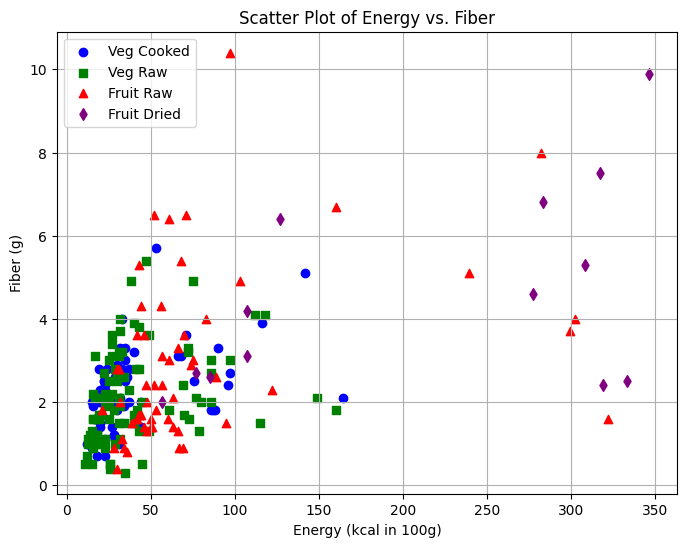

In [64]:
plt.figure(figsize=(8, 6))
plt.scatter(df_v_vc['kcal_in_100g'], df_v_vc['fiber_in_g'], label='Veg Cooked', color='blue', marker='o')

plt.scatter(df_v_vr['kcal_in_100g'], df_v_vr['fiber_in_g'], label='Veg Raw', color='green', marker='s')

plt.scatter(df_v_fr['kcal_in_100g'], df_v_fr['fiber_in_g'], label='Fruit Raw', color='red', marker='^')

plt.scatter(df_v_fd['kcal_in_100g'], df_v_fd['fiber_in_g'], label='Fruit Dried', color='purple', marker='d')


plt.xlabel('Energy (kcal in 100g)')
plt.ylabel('Fiber (g)')
plt.title('Scatter Plot of Energy vs. Fiber')
plt.legend()


plt.grid(True)
plt.show()

In [87]:
# We can see from the graph that vegetables are more likely to be less caloric than fruits.


selected_columns = ['kcal_in_100g', 'fiber_in_g', 'mg_in_mg', 'zn_in_mg', 'vitamin_a_in_mcg', 'vitamin_c_in_mg', 'vitamin_e_in_mg', "p_in_mg"]
subset_data = union_dfs[selected_columns]

correlation_matrix_pearson = subset_data.corr(method='pearson')
print(correlation_matrix_pearson)

                  kcal_in_100g  fiber_in_g  mg_in_mg  zn_in_mg  \
kcal_in_100g          1.000000    0.513878  0.173176  0.057523   
fiber_in_g            0.513878    1.000000  0.176226  0.018912   
mg_in_mg              0.173176    0.176226  1.000000  0.339929   
zn_in_mg              0.057523    0.018912  0.339929  1.000000   
vitamin_a_in_mcg     -0.117160   -0.066065  0.096238 -0.006556   
vitamin_c_in_mg      -0.068607    0.019022 -0.036388 -0.061749   
vitamin_e_in_mg       0.112755    0.130203  0.189935  0.122764   
p_in_mg               0.356854    0.249599  0.492817  0.548795   

                  vitamin_a_in_mcg  vitamin_c_in_mg  vitamin_e_in_mg   p_in_mg  
kcal_in_100g             -0.117160        -0.068607         0.112755  0.356854  
fiber_in_g               -0.066065         0.019022         0.130203  0.249599  
mg_in_mg                  0.096238        -0.036388         0.189935  0.492817  
zn_in_mg                 -0.006556        -0.061749         0.122764  0.548795  


In [99]:
selected_columns = ['kcal_in_100g', 'fiber_in_g', 'mg_in_mg', 'zn_in_mg', 'vitamin_a_in_mcg', 'vitamin_c_in_mg', 'vitamin_e_in_mg', "p_in_mg"]
subset_data = df_v_fr[selected_columns]

correlation_matrix_pearson = subset_data.corr(method='pearson')
print(correlation_matrix_pearson)

                  kcal_in_100g  fiber_in_g  mg_in_mg  zn_in_mg  \
kcal_in_100g          1.000000    0.346121  0.587622  0.262042   
fiber_in_g            0.346121    1.000000  0.464979  0.492641   
mg_in_mg              0.587622    0.464979  1.000000  0.292418   
zn_in_mg              0.262042    0.492641  0.292418  1.000000   
vitamin_a_in_mcg     -0.164249   -0.076702 -0.056535 -0.023531   
vitamin_c_in_mg      -0.206113    0.048367 -0.033175 -0.018302   
vitamin_e_in_mg      -0.095140    0.166304 -0.028114  0.537237   
p_in_mg               0.714154    0.513491  0.779382  0.383207   

                  vitamin_a_in_mcg  vitamin_c_in_mg  vitamin_e_in_mg   p_in_mg  
kcal_in_100g             -0.164249        -0.206113        -0.095140  0.714154  
fiber_in_g               -0.076702         0.048367         0.166304  0.513491  
mg_in_mg                 -0.056535        -0.033175        -0.028114  0.779382  
zn_in_mg                 -0.023531        -0.018302         0.537237  0.383207  


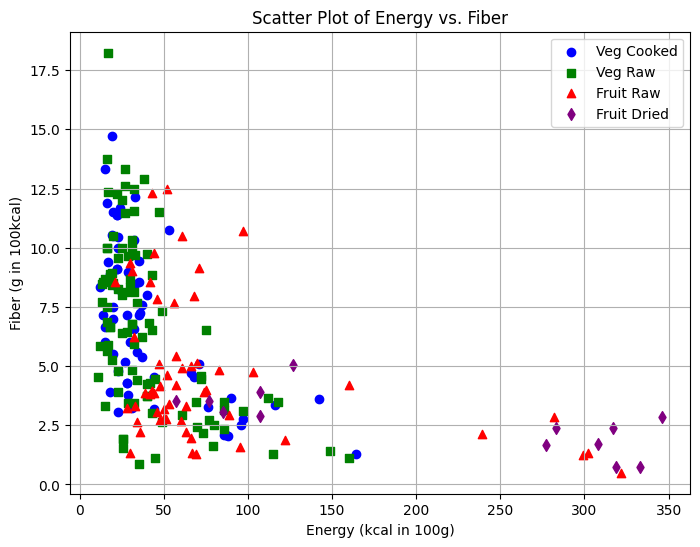

In [101]:
plt.figure(figsize=(8, 6))
plt.scatter(df_v_vc['kcal_in_100g'], df_v_vc['fiber_in_100kcal'], label='Veg Cooked', color='blue', marker='o')

plt.scatter(df_v_vr['kcal_in_100g'], df_v_vr['fiber_in_100kcal'], label='Veg Raw', color='green', marker='s')

plt.scatter(df_v_fr['kcal_in_100g'], df_v_fr['fiber_in_100kcal'], label='Fruit Raw', color='red', marker='^')

plt.scatter(df_v_fd['kcal_in_100g'], df_v_fd['fiber_in_100kcal'], label='Fruit Dried', color='purple', marker='d')

plt.xlabel('Energy (kcal in 100g)')
plt.ylabel('Fiber (g in 100kcal)')
plt.title('Scatter Plot of Energy vs. Fiber')
plt.legend()

plt.grid(True)
plt.show()